In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = [12.0/2, 8.0/2]

In [3]:
filename = './data/homework_1_data_Y1.csv'
Y1 = np.genfromtxt(filename, delimiter=',')
filename = './data/homework_1_data_Y2.csv'
Y2 = np.genfromtxt(filename, delimiter=',')
filename = './data/homework_1_data_Y3.csv'
Y3 = np.genfromtxt(filename, delimiter=',')


In [4]:
Y3

array([ 5.40959e+03,  5.44481e+03,  5.85409e+03,  5.49327e+03,
        5.34086e+03,  5.17251e+03,  5.84672e+03,  6.03207e+03,
        5.57526e+03,  5.82488e+03,  5.68087e+03,  5.61624e+03,
        5.46462e+03,  5.48221e+03,  5.41098e+03,  5.23435e+03,
        5.51865e+03,  5.50072e+03,  5.40757e+03,  5.43820e+03,
        5.45193e+03,  5.27864e+03,  5.43904e+03,  5.50376e+03,
        5.10374e+03,  5.56013e+03,  5.61030e+03,  5.41819e+03,
        5.38261e+03,  5.41552e+03,  5.57526e+03,  5.63373e+03,
        5.56930e+03,  5.56461e+03,  5.68332e+03,  5.77769e+03,
        5.60112e+03,  5.59533e+03,  5.65585e+03,  5.74872e+03,
        5.90111e+03,  5.99786e+03,  5.62131e+03,  5.94504e+03,
        6.12125e+03,  5.97616e+03,  5.73103e+03,  5.65574e+03,
        6.00892e+03,  5.77966e+03,  6.04642e+03,  5.89778e+03,
        6.27554e+03,  5.79771e+03,  5.95027e+03,  6.11336e+03,
        6.11380e+03,  6.00705e+03,  6.57463e+03,  6.60309e+03,
        6.20543e+03,  6.33882e+03,  6.32909e+03,  6.369

In [4]:
Y1_day_index = np.arange(0, np.size(Y1), 1) / 24
Y1_hour_index = np.arange(0, np.size(Y1), 1)
Y2_day_index = np.arange(0, np.size(Y2), 1) / 24
Y2_hour_index = np.arange(0, np.size(Y2), 1)
np.shape(Y2)
np.shape(Y3)

(637,)

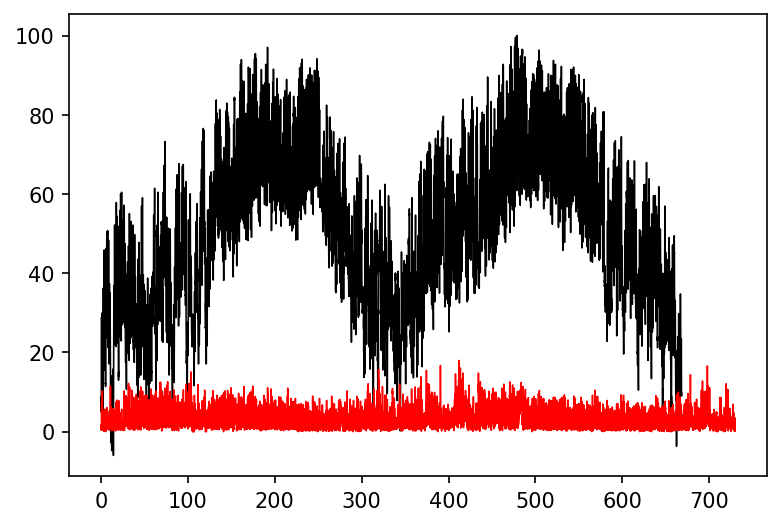

In [5]:
plt.figure()
plt.plot(Y1_day_index, Y1, linewidth=0.75, color='k')
plt.plot(Y2_day_index, Y2, linewidth=0.75, color='r')

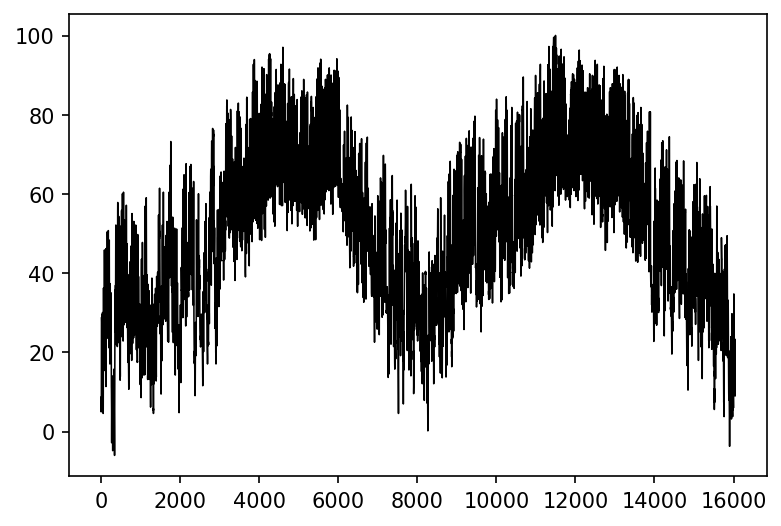

In [6]:
plt.figure()
plt.plot(Y1_hour_index, Y1, linewidth=0.75, color='k')

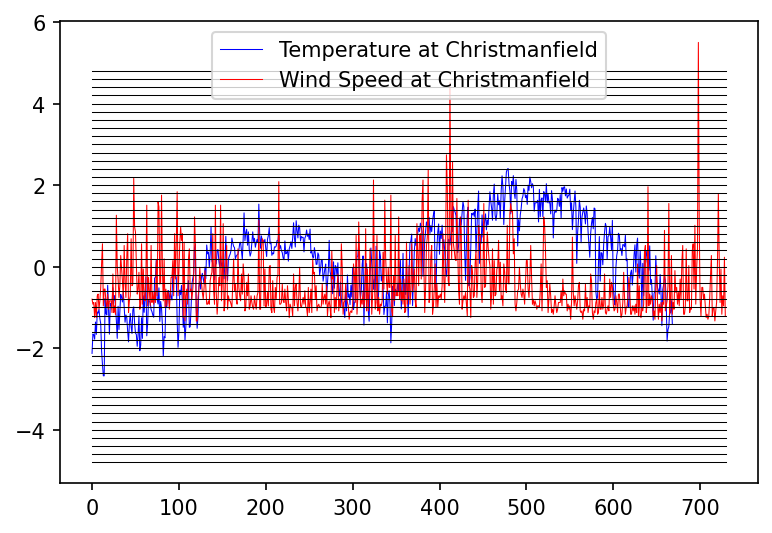

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
v1 = np.std(Y1)
v2 = np.std(Y2)
v3 = np.std(Y3)
Y1_s = (Y1 - np.mean(Y1)) / v1
Y2_s = (Y2 - np.mean(Y2)) / v2
Y3_s = (Y3 - np.mean(Y3)) / v3
plt.plot(Y1_day_index[::24], Y1_s[::24], linewidth=0.5, color='b', label= 'Temperature at Christmanfield')
plt.plot(Y2_day_index[::24], Y2_s[::24], linewidth=0.5, color='r', label= 'Wind Speed at Christmanfield')
plt.legend()
xinc = 0.2
xmin = -5
xmax = 5
bins = np.arange(xmin, xmax, xinc)
for ind, val in enumerate(bins[1:]):
    ax.plot([0, max(Y1_day_index [-1],Y2_day_index[-1])], [val, val], linewidth=0.5, color='k')

Text(0, 0.5, 'Density')

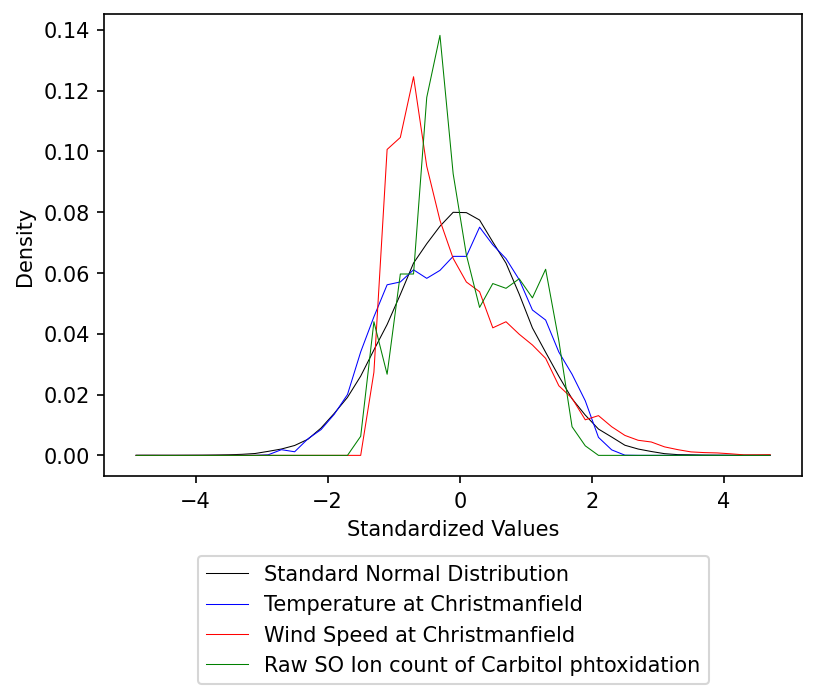

In [8]:
h_Y1_s = np.histogram(Y1_s, bins)
h_Y2_s = np.histogram(Y2_s, bins)
h_Y3_s = np.histogram(Y3_s, bins)  #????


fig = plt.figure()
xvals_1 = h_Y1_s[1][:-1]
xvals_2 = h_Y2_s[1][:-1]
xvals_3 = h_Y3_s[1][:-1] #????
fvals_Y1 = h_Y1_s[0].astype(float) / np.size(Y1_s)
fvals_Y2 = h_Y2_s[0].astype(float) / np.size(Y2_s)
fvals_Y3 = h_Y3_s[0].astype(float) / np.size(Y3_s) #????


Z = np.random.normal(0, 1, size = (100_000,))
h_Z = np.histogram(Z, bins)
xvals_z = h_Z[1][:-1]
fvals_z = h_Z[0].astype(float) / np.size(Z)
plt.plot(xvals_z+xinc/2, fvals_z, linewidth=0.5, color='k', label= 'Standard Normal Distribution')

plt.plot(xvals_1+xinc/2, fvals_Y1, linewidth=0.5, color='b', label= 'Temperature at Christmanfield')
plt.plot(xvals_2+xinc/2, fvals_Y2, linewidth=0.5, color='r', label= 'Wind Speed at Christmanfield')
plt.plot(xvals_3+xinc/2, fvals_Y3, linewidth=0.5, color='g', label= 'Raw SO Ion count of Carbitol phtoxidation')
#show the legend on the bottom outside of the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
# plt.legend()
plt.xlabel('Standardized Values')
plt.ylabel('Density')



Text(0, 0.5, 'Density')

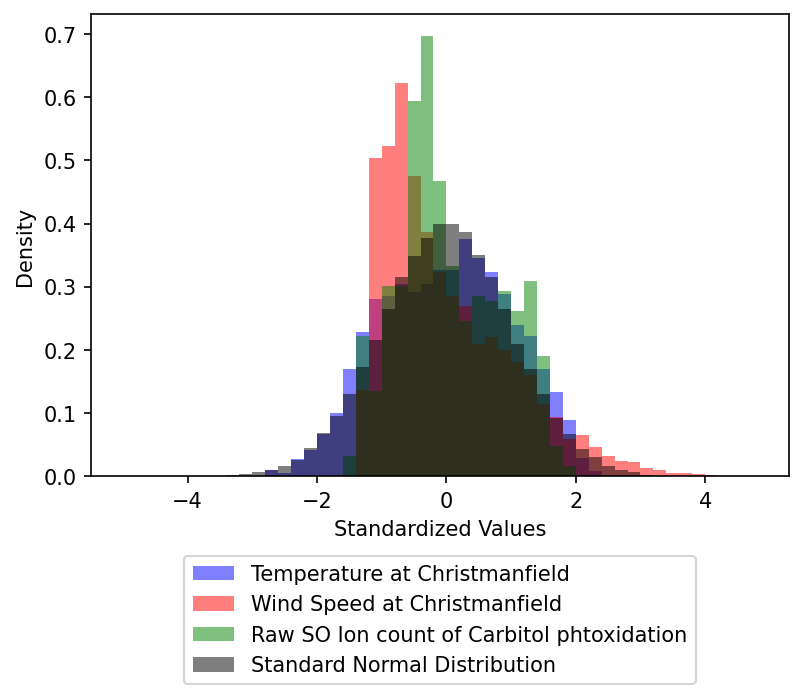

In [12]:
# plotting the histogram of the standardized values
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(Y1_s, bins, alpha=0.5, color='b', label='Temperature at Christmanfield', density=True)
plt.hist(Y2_s, bins, alpha=0.5, color='r', label='Wind Speed at Christmanfield', density=True)
plt.hist(Y3_s, bins, alpha=0.5, color='g', label='Raw SO Ion count of Carbitol phtoxidation', density=True)
plt.hist(Z, bins, alpha=0.5, color='k', label='Standard Normal Distribution', density=True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.xlabel('Standardized Values')
plt.ylabel('Density')


In [9]:
# For Y1_s
index_Y1 = np.where(xvals_1 + xinc/2 > 2)[0]
area_Y1 = np.sum(fvals_Y1[index_Y1] * xinc)

# For Y2_s
index_Y2 = np.where(xvals_2 + xinc/2 > 2)[0]
area_Y2 = np.sum(fvals_Y2[index_Y2] * xinc)

# For Z
index_Z = np.where(xvals_z + xinc/2 > 2)[0]
area_Z = np.sum(fvals_z[index_Z] * xinc)

area_Y1, area_Y2, area_Z

(0.00155850632753569, 0.009406392694063929, 0.0045119999999999995)

In [49]:
fvals_Y1

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.87020759e-04, 1.87020759e-03,
       1.18446481e-03, 5.42360202e-03, 8.47827442e-03, 1.35278349e-02,
       2.00112212e-02, 3.40377782e-02, 4.55707250e-02, 5.61062278e-02,
       5.70413316e-02, 6.10311078e-02, 5.82257964e-02, 6.08440870e-02,
       6.54572658e-02, 6.54572658e-02, 7.50576647e-02, 6.92600212e-02,
       6.47091827e-02, 5.77894146e-02, 4.78149741e-02, 4.45109407e-02,
       3.39754379e-02, 2.66816283e-02, 1.79539929e-02, 5.92232404e-03,
       1.80786734e-03, 6.23402531e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [1]:
#make the average of Y1 to Y2



In [10]:
Y1 = pd.read_csv("./data/homework_1_data_Y1.csv", header=None)
Y1.head()
Y1_average = Y1.mean(axis=0)
Y1_average
Y1.plot()
plt.text(0.95, 0.925,'$\sigma = $''$^o$F', ha='right',
         transform=plt.gca().transAxes, color = 'k')
plt.axvline(x=Y1_average, color = 'white')

NameError: name 'pd' is not defined